# Overlay of the Koshino model bands on the CSC model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ROOT = '/Users/jonathanlu/Documents'
MAT = 'tvMoS2'
KMAT = 'MoS2'
THETA = 8.0
REL_PATH = f'{ROOT}/{MAT}/bands/t{THETA}'
DREL_PATH = f'{ROOT}/{MAT}/dos/t{THETA}'

In [30]:
k_mags_path = f'{REL_PATH}/kmags.npy'
evals_path = f'{REL_PATH}/evals.npy'
dos_path = f'{DREL_PATH}/DOS_{THETA}.npy'
kosh_path = f'{ROOT}/koshino/{KMAT}/band_koshino_{THETA}.npz'
kosh_dos_path = f'{ROOT}/koshino/{KMAT}/dos_koshino_{THETA}.npz'

In [31]:
k_mags = np.load(k_mags_path)
evals = np.sort(np.load(evals_path), axis=1)
signs = -1*(evals < -5e-1) + 1*(evals >= -5e-1)
nmodes = evals.shape[1]
kosh_modes = np.load(kosh_path)
kosh_nmodes = kosh_modes.shape[1]
kosh_mags = np.linspace(k_mags[0], k_mags[-1], len(kosh_modes))
kosh_dos = np.load(kosh_dos_path)
print(kosh_mags.shape)
print(k_mags.shape)
print(signs.shape)

dos = np.load(dos_path)

(300,)
(301,)
(301, 126)


In [39]:
adjusted_kosh_modes = 23*kosh_modes
min_mode, max_mode = np.min(modes), np.max(modes)
kosh_min_mode, kosh_max_mode = np.min(adjusted_kosh_modes), np.max(adjusted_kosh_modes)
ndos = len(dos)
omegas = np.linspace(min_mode, max_mode, ndos)
kosh_omegas = np.linspace(kosh_min_mode, kosh_max_mode, ndos)

adjusted_kosh_dos = 12*kosh_dos

<Figure size 432x288 with 0 Axes>

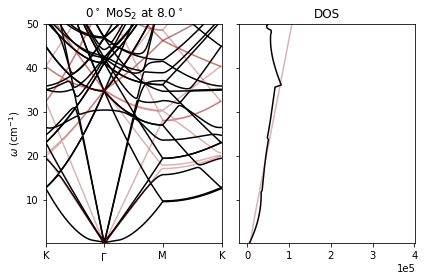

In [42]:
# Plot the CSC modes above the Koshino modes 
modes = np.sqrt(np.abs(evals))*signs
plt.clf()
fig, [axband, axdos] = plt.subplots(nrows=1, ncols=2, sharey=True)
plt.ylim(bottom=np.min(modes), top=50)

axband.set_title(rf"$0^\circ$ MoS$_2$ at {THETA}$^\circ$")
axband.plot(modes, c='black')
axband.plot(adjusted_kosh_modes, c='darkred', alpha=0.3)
axband.set_xlim(left=0, right=301)
axband.set_xticks([0,100,200,301])
axband.set_xticklabels(['K', r'$\Gamma$', 'M', 'K'])
axband.set_ylabel(r'$\omega$ (cm$^{-1}$)')

axdos.plot(dos, omegas, c='black')
axdos.set_title("DOS")
axdos.plot(adjusted_kosh_dos, kosh_omegas, c='darkred', alpha=0.3)
axdos.ticklabel_format(axis='x', style='sci', scilimits=(5,6))

plt.tight_layout()
plt.show()